### Diabetesデータ

sklearnデータセット　https://scikit-learn.org/stable/api/sklearn.datasets.html

参考文献：https://qiita.com/RiRyCasals/items/2ea25de39610db0c78be

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 26277.7266 - val_loss: 24375.2637
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23881.4434 - val_loss: 13535.1826
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10675.3223 - val_loss: 6005.3594
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5109.4219 - val_loss: 6172.6445
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4515.1660 - val_loss: 3879.4517
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3580.6196 - val_loss: 3577.5667
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3460.9155 - val_loss: 3448.9182
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3138.4731 - val_loss: 3123.7642
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3120.2678 - val_loss: 2905.1624
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2814.1777 - val_loss: 2962.3208
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2932.7327 - val_loss: 3041.0884
Epoch 12/100
9/9 ━━━━━━━━━

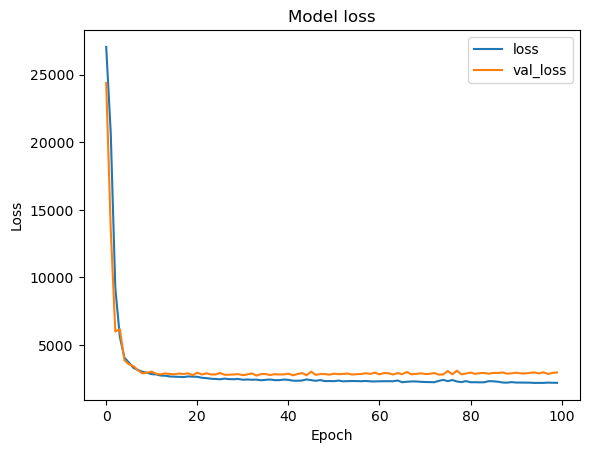

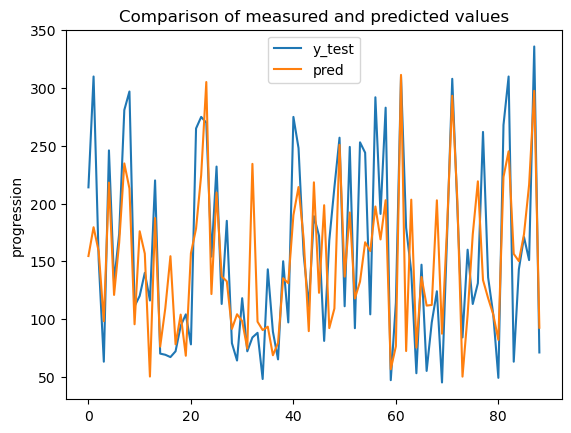

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# データセットの読み込み
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# データをDataFrameに変換
df_data = pd.DataFrame(data, columns=diabetes.feature_names)
df_target = pd.DataFrame(target, columns=['progression'])

# データの分割
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=141)

# データの標準化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# モデルの構築
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 回帰問題のため出力層は1ユニット

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# モデルの学習
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
pred = model.predict(x_test)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print('R2 :', r2)
print('RMSE :', rmse)
print('MAE :', mae)

# 学習の過程をプロット
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# 実測値と予測値のプロット
x = np.arange(y_test.shape[0])
plt.title('Comparison of measured and predicted values')
plt.ylabel('progression')
plt.plot(x, y_test, label='y_test')
plt.plot(x, pred, label='pred')
plt.legend()
plt.show()


### Boston Housingデータ

参考文献：https://qiita.com/sw1394/items/f25dea5cf24ce78dbb0c

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 468.8958 - val_loss: 178.1964
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.5086 - val_loss: 46.3784
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.4821 - val_loss: 29.6817
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.5918 - val_loss: 22.0047
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.8712 - val_loss: 20.0935
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.7017 - val_loss: 18.0357
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6977 - val_loss: 16.3182
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9420 - val_loss: 15.4599
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4894 - val_loss: 15.8015
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.0171 - val_loss: 14.7373
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4978 - val_loss: 14.9827
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

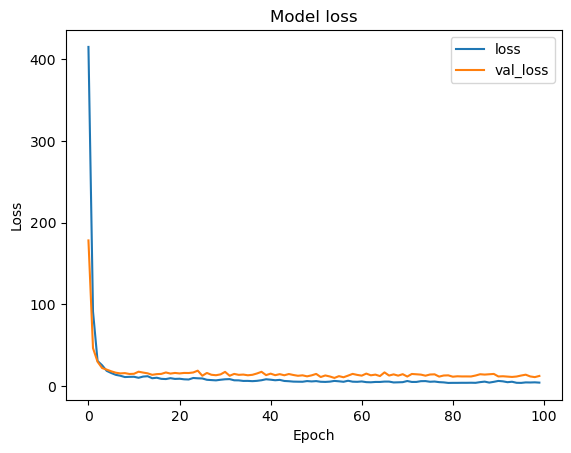

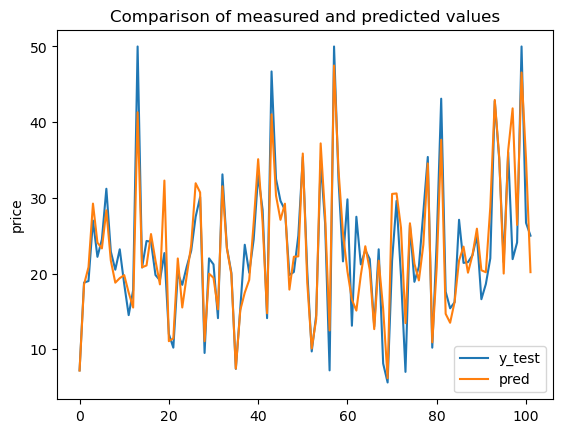

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import boston_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# データセットの読み込み
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# データをDataFrameに変換
df_data_train = pd.DataFrame(x_train)
df_target_train = pd.DataFrame(y_train, columns=['price'])
df_data_test = pd.DataFrame(x_test)
df_target_test = pd.DataFrame(y_test, columns=['price'])

# データの標準化
scaler = StandardScaler()
x_train = scaler.fit_transform(df_data_train)
x_test = scaler.transform(df_data_test)

# モデルの構築
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 回帰問題のため出力層は1ユニット

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# モデルの学習
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
pred = model.predict(x_test)
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print('R2 :', r2)
print('RMSE :', rmse)
print('MAE :', mae)

# 学習の過程をプロット
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# 実測値と予測値のプロット
x = np.arange(y_test.shape[0])
plt.title('Comparison of measured and predicted values')
plt.ylabel('price')
plt.plot(x, y_test, label='y_test')
plt.plot(x, pred, label='pred')
plt.legend()
plt.show()
